# MPAS-Ocean volumetric TS

### Ten-year periods (1947-1956, 1997-2006)

LR (60to30E2r2) and HR (18to6v3) CORE-forced 20-21st century simulations (Cycle 1).

***

In [1]:
import xarray as xr
import numpy as np
import sys
from matplotlib import pyplot as plt, colors, patches
from datetime import datetime
from tqdm import tqdm
from fastjmd95 import rho

# Import modules from path
sys.path.append('../modules/')
import aggregate_mpas_2Dvariables as tools

# Set plot font sizes
plt.rcParams.update({'font.size': 10, 'axes.titlesize': 'medium'})

***

### Functions

In [2]:
def plot_compare_TS(month, regions):
    """
    """
    
    # Make figure
    fig, axs = plt.subplots(2, 4, figsize=(12, 6), gridspec_kw={'wspace': 0.1, 'hspace': 0.1})
    xlim, ylim = [33, 36], [-2.5, 14]
    axs[1, 1].set_xlabel('Practical Salinity [PSU]', x=1)
    axs[0, 0].set_ylabel('Potential temperature [$^{\circ}$C]', y=0)
    props = {'fc': 'w', 'boxstyle': 'round', 'alpha': 0.7}

    # Loop through meshes and regions
    for row, mesh in zip(axs, meshes):
        row[0].add_patch(patches.Rectangle((34.5, 5), 1, 5, fill=False, ec='k', zorder=10))
        for ax, region in zip(row, regions):
            
            # Plot volume and density
            volume = ds[mesh].volumetricTS.sel(regionNames=region)
            c = ax.pcolormesh(S, T, volume[month, ...], cmap='Reds', norm=colors.LogNorm(vmin=1, vmax=1e6))
            ax.contour(S, T, sigma, levels=np.arange(25, 30, 0.5), colors='gray', linestyles='--')
            ax.contour(S, T, sigma, levels=[27], colors='k')
            
            # Formatting
            ax.set_xlim(xlim)
            ax.set_ylim(ylim)
            if mesh == meshes[0]:
                ax.xaxis.set_ticklabels('')
                ax.set_title(region)
            if region != 'Labrador Sea':
                ax.yaxis.set_ticklabels('')
            else:
                ax.text(0.03, 0.9, mesh, bbox=props, transform=ax.transAxes)
    
    cax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
    fig.colorbar(c, cax=cax, label='Bin volume [km$^{3}$]')
    
    return fig, axs

***

### Load results

In [3]:
# Load results
meshes = ['EC30to60E2r2', 'oRRS18to6v3']
ds = {}
for mesh in meshes:
    f = f'/pscratch/sd/b/bmoorema/results/aggregated/raw/20210421_sim7_CORE_{mesh}.mpas2Daggregated_19470101_20061201.nc'
    ds[mesh] = xr.open_dataset(f)

S, T = [ds[meshes[0]][name] for name in ('salinityBins', 'temperatureBins')]
Sgrid, Tgrid = np.meshgrid(S, T)
sigma = rho(Sgrid, Tgrid, 0) - 1000

***

### Plots

In [4]:
# Regions
regions = ['Labrador Sea', 'Irminger Sea', 'Iceland Basin', 'Greenland Sea']

January 1947

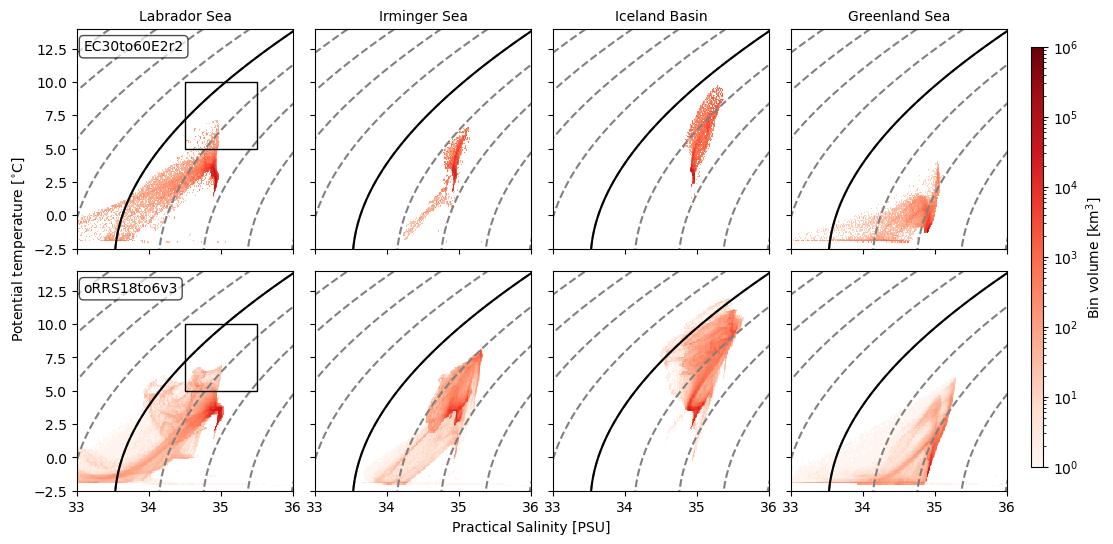

In [5]:
# January 1947
fig, axs = plot_compare_TS(0, regions)

January 1956

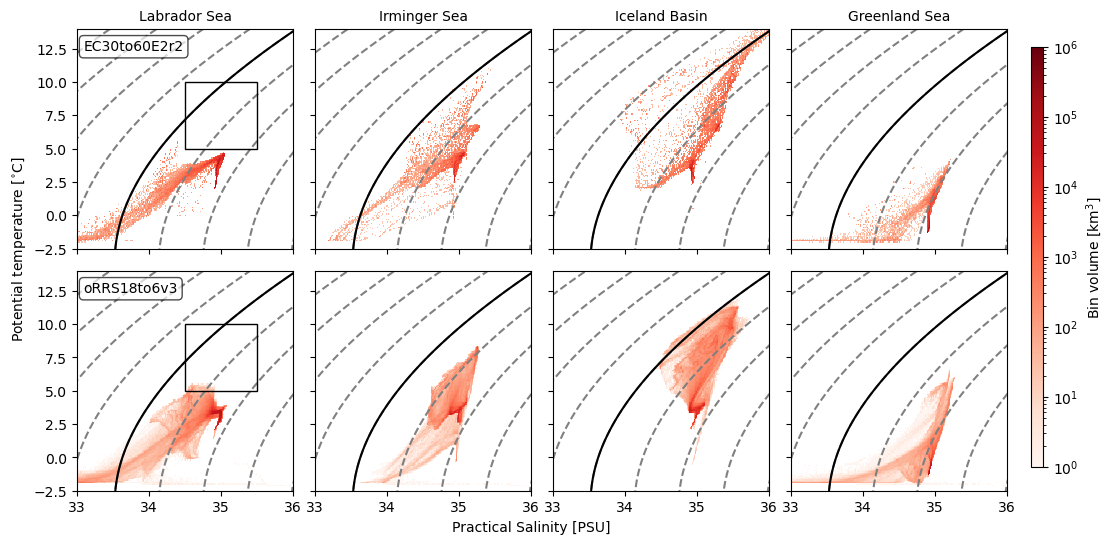

In [6]:
# January 1956
fig, axs = plot_compare_TS(108, regions)

January 1997

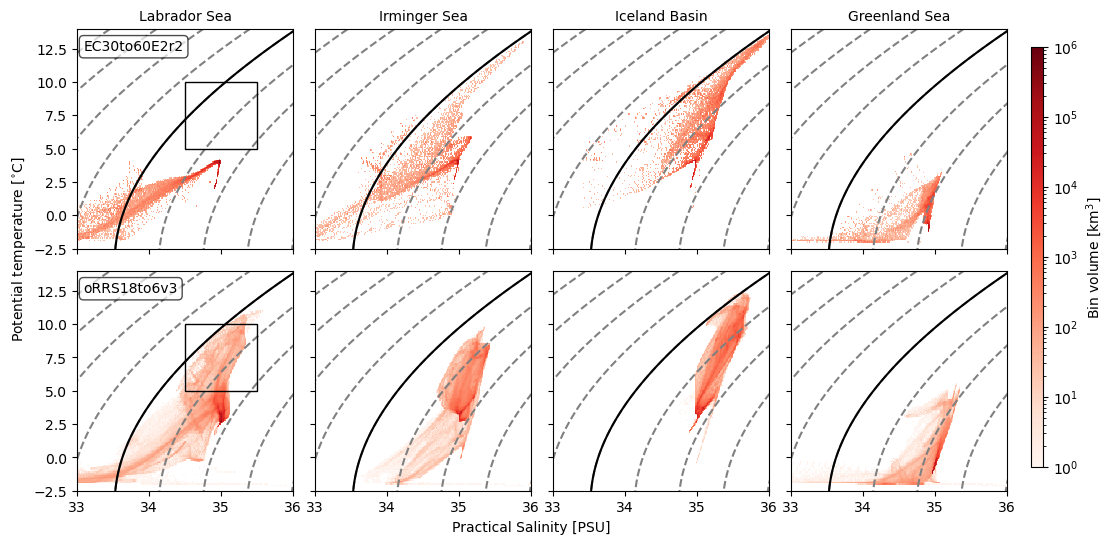

In [7]:
# January 1997
fig, axs = plot_compare_TS(120, regions)

January 2006

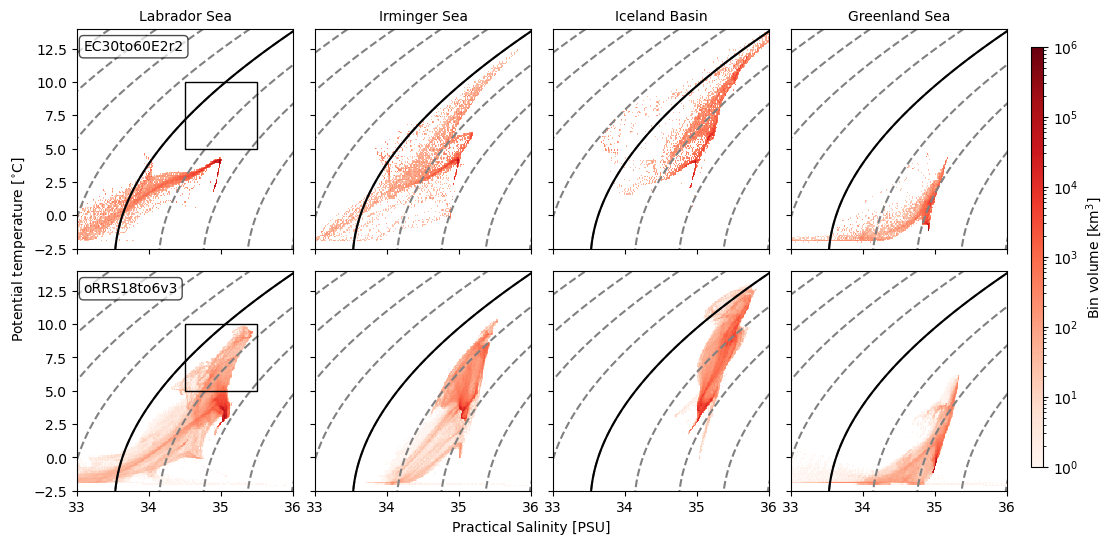

In [8]:
# January 2006
fig, axs = plot_compare_TS(228, regions)